# **Clustering Algorithm** 
-------

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 1. Loading and Preprocessing

In [105]:
iris = load_iris()

In [107]:
iris_df = pd.DataFrame(data.data, columns=data.feature_names)

In [109]:
iris_df.head(11)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [111]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [113]:
df.shape

(150, 4)

## 2.Clustering Algorithm Implementation

### A) KMeans Clustering

#### Description of KMeans Clustering:
------
#### KMeans is an iterative algorithm that partitions a dataset into K clusters. It works by:
#### 1. Initializing K centroids randomly.
#### 2. Assigning each data point to the nearest centroid.
#### 3. Recomputing the centroids based on the mean of the assigned data points.
#### 4. Repeating steps 2-3 until convergence (centroids no longer change or a max iteration is reached).

#### Why KMeans is suitable for the Iris dataset
----
#### The Iris dataset is small, well-structured, and numeric, which aligns with KMeans' requirements for effective clustering.

### Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters

In [101]:
from sklearn.cluster import KMeans   

In [133]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
iris_df['kmeans_cluster'] = kmeans.fit_predict(iris_df)

C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


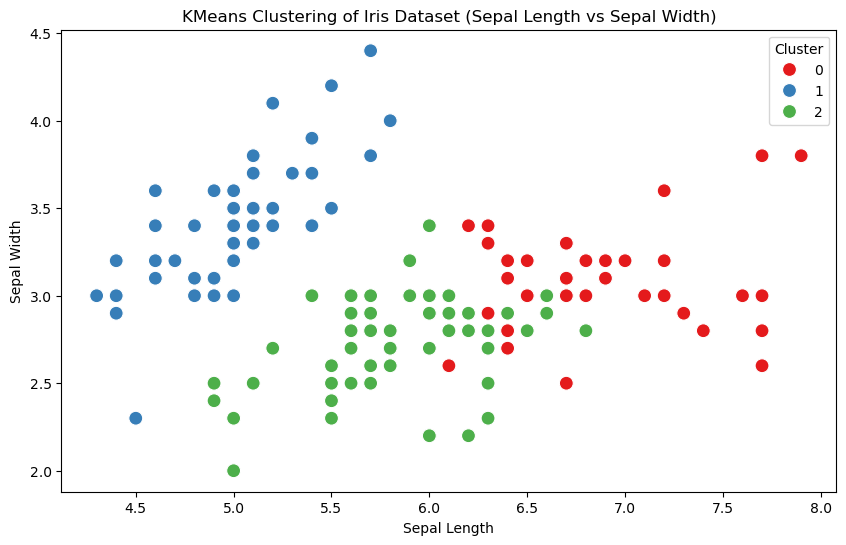

In [135]:
# Visualize the clusters using sepal length and sepal width  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['kmeans_cluster'], palette='Set1', s=100)  
plt.title('KMeans Clustering of Iris Dataset (Sepal Length vs Sepal Width)')  
plt.xlabel('Sepal Length')  
plt.ylabel('Sepal Width')  
plt.legend(title='Cluster')  
plt.show()  

In [137]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)  
iris_pca = pca.fit_transform(iris_df.iloc[:, :-1])

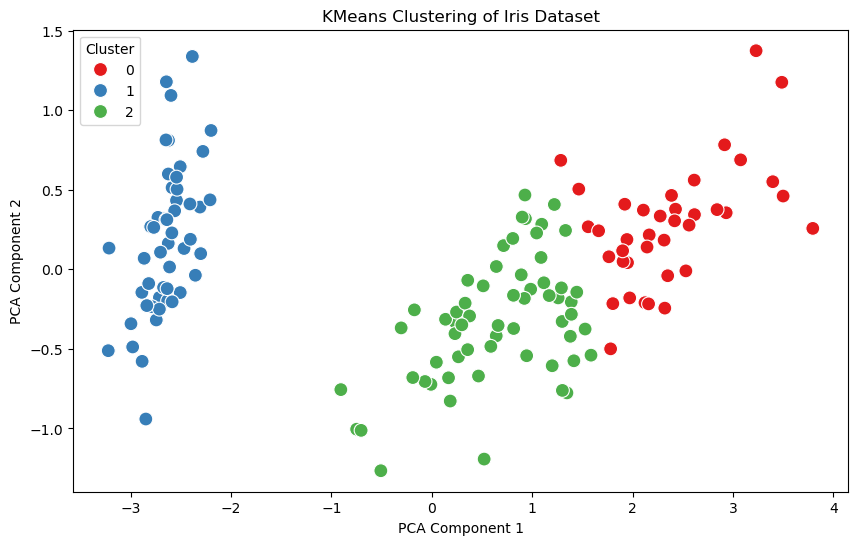

In [139]:
# Visualizing clusters with PCA  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=iris_df['kmeans_cluster'], palette='Set1', s=100)  
plt.title('KMeans Clustering of Iris Dataset')  
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  
plt.legend(title='Cluster')  
plt.show()

### B) Hierarchical Clustering

#### Description of Hierarchical Clustering:
------
#### Hierarchical clustering builds a tree (dendrogram) of clusters by:
#### 1. Starting with each data point as its own cluster.
#### 2. Merging the two closest clusters iteratively based on a distance metric.
#### 3. Stopping when all points are in a single cluster or a desired number of clusters is reached.


#### Why Hierarchical Clustering is suitable for the Iris dataset:
---
#### The Iris dataset is small enough for hierarchical clustering to compute efficiently. The dendrogram provides insights into the
#### structure of the data, which can be useful for understanding the relationships between samples.

#### Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.

In [141]:
from sklearn.cluster import AgglomerativeClustering  
from scipy.cluster.hierarchy import dendrogram, linkage

In [143]:
# Apply Agglomerative Hierarchical Clustering  
hierarchical = AgglomerativeClustering(n_clusters=3)  
iris_df['hierarchical_cluster'] = hierarchical.fit_predict(iris_df) 

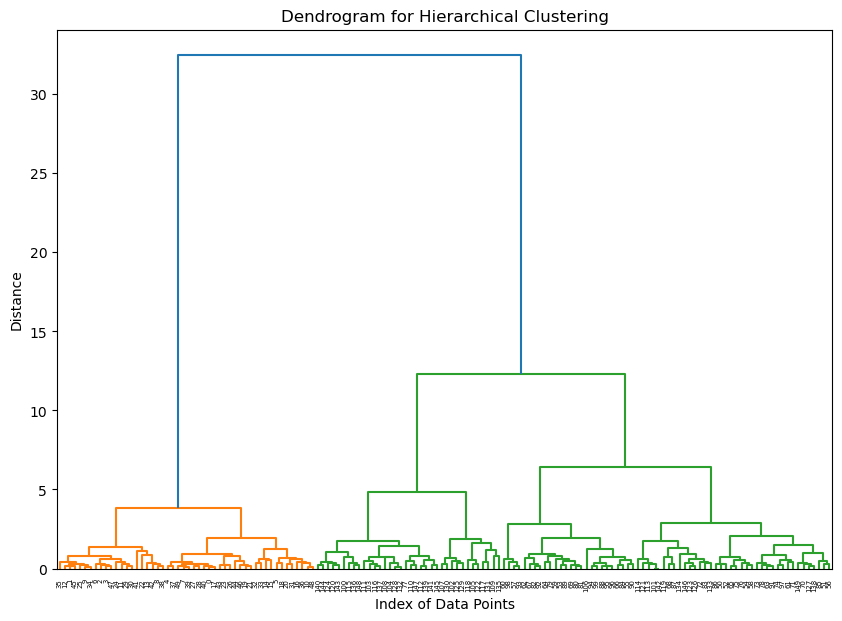

In [145]:
# Visualization of the Hierarchical Clustering using a dendrogram  
plt.figure(figsize=(10, 7))  
Z = linkage(iris_df.iloc[:, :-2], method='ward')  
dendrogram(Z, labels=iris_df.index)  
plt.title('Dendrogram for Hierarchical Clustering')  
plt.xlabel('Index of Data Points')  
plt.ylabel('Distance')  
plt.show()  

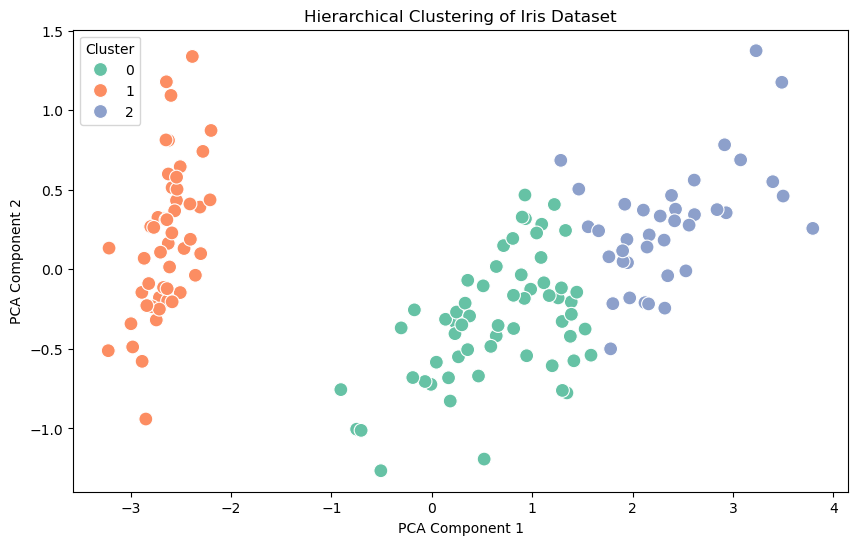

In [147]:
# Visualizing clusters with PCA  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=iris_df['hierarchical_cluster'], palette='Set2', s=100)  
plt.title('Hierarchical Clustering of Iris Dataset')  
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  
plt.legend(title='Cluster')  
plt.show() 